In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

path = r"C:\Users\chan\Desktop\git\TIL\Python\Data\carsdata"

In [2]:
df = pd.read_csv(path+"\cars.csv")

In [3]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
corr = df.corr()
corr

,mpg,cylinders,hp,time-to-60,year
mpg,1.000000,-0.776710,-0.774905,0.509070,0.550441
cylinders,-0.776710,1.000000,0.845155,-0.578161,-0.322239
hp,-0.774905,0.845155,1.000000,-0.744873,-0.383869
time-to-60,0.509070,-0.578161,-0.744873,1.000000,0.312311
year,0.550441,-0.322239,-0.383869,0.312311,1.000000


In [5]:
import matplotlib
matplotlib.__version__

'3.2.1'

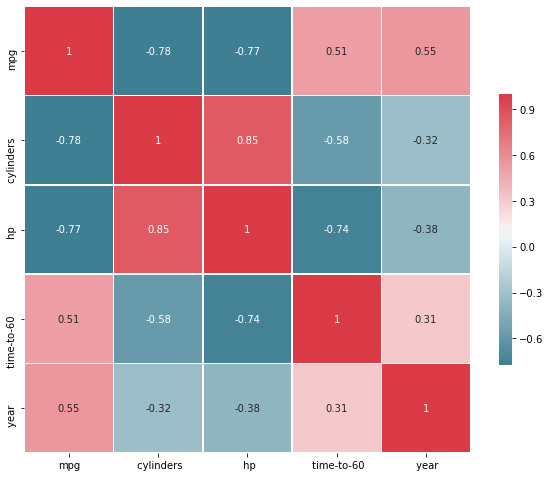

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, square=True, linewidths=.5, cbar_kws={'shrink': .5})

`cylinders`와 `hp`가 강한 양의 상관관계를 가지고 있습니다. 
`cylinders`를 통해서 `hp`를 예측하는 선형회귀 모델을 만들어 보겠습니다.

In [3]:
xtrain = list(df[' cylinders'])
ytrain = list(df[' hp'])

In [4]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hf = x*w + b
cost = tf.reduce_mean(tf.square(hf-ytrain))

opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opt.minimize(cost)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
for step in range(150):
    sess.run(train, feed_dict={x:xtrain})
    if step % 10 == 0:
        wv, bv, cv = sess.run([w, b, cost], feed_dict={x:xtrain, y:ytrain})
        print(f'weight : {wv}, bias : {bv}, cost : {cv}')

weight : [1.1753361], bias : [1.6487181], cost : 11130.875
weight : [10.072178], bias : [3.0899506], cost : 2952.85546875
weight : [14.364864], bias : [3.7776883], cost : 1050.061767578125
weight : [16.436695], bias : [4.1019845], cost : 607.3232421875
weight : [17.437277], bias : [4.2509847], cost : 504.2949523925781
weight : [17.92113], bias : [4.3154407], cost : 480.3072814941406
weight : [18.155733], bias : [4.33913], cost : 474.7099914550781
weight : [18.270105], bias : [4.343167], cost : 473.3915100097656
weight : [18.326479], bias : [4.337736], cost : 473.06878662109375
weight : [18.354876], bias : [4.3277526], cost : 472.9776306152344
weight : [18.369778], bias : [4.315585], cost : 472.9405822753906
weight : [18.378168], bias : [4.3023763], cost : 472.916015625
weight : [18.383413], bias : [4.288678], cost : 472.89447021484375
weight : [18.38714], bias : [4.2747555], cost : 472.8738098144531
weight : [18.390131], bias : [4.2607374], cost : 472.85321044921875


## 임의의 실린더 값을 입력 했을 때

In [7]:
x_list = [5,11,21,37]
for x_ in x_list:
    yhat = sess.run(w)[0]*x_ + sess.run(b)[0]
    print(f'cylinder is {x_} then, hp would be : {yhat}')

cylinder is 5 then, hp would be : 96.21066761016846
cylinder is 11 then, hp would be : 206.56575870513916
cylinder is 21 then, hp would be : 390.49091053009033
cylinder is 37 then, hp would be : 684.7711534500122


## Cost 함수 시각화

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_history = []
steps = []
for step in range(100):
    _, cval = sess.run([train,cost], feed_dict={x:xtrain})
    cost_history.append(cval)
    steps.append(step)

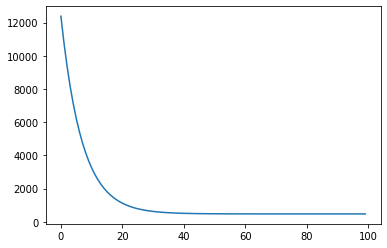

In [10]:
import matplotlib.pyplot as plt

plt.plot(steps, cost_history)
plt.show()